# Ordinary Differential Equations (ODE) Solver 

This is an example code for solving systems of ordinary differential equations with Python in IPy/Jupyter Notebooks.

The solution below is to this problem:

$$\frac{dA}{dt} = c_1 - c_2 \cdot A^{0.5}$$
$$\frac{dB}{dt} = c_2 \cdot A^{0.5}$$

$c_1 = 1 \ s^{-1}; c_2 = 0.2 \ s^{-1}$

$t_0 = 0 \ s; t_f = 10 \ s$

$A_0 = 5 ; B_0 = 1$


     Time (s)  A (units)  B (units)
0         0.0   5.000000   1.000000
1         0.1   5.055155   1.044845
2         0.2   5.110066   1.089934
3         0.3   5.164734   1.135266
4         0.4   5.219163   1.180837
..        ...        ...        ...
96        9.6   9.418156   6.181844
97        9.7   9.456717   6.243283
98        9.8   9.495153   6.304847
99        9.9   9.533464   6.366536
100      10.0   9.571650   6.428350

[101 rows x 3 columns]


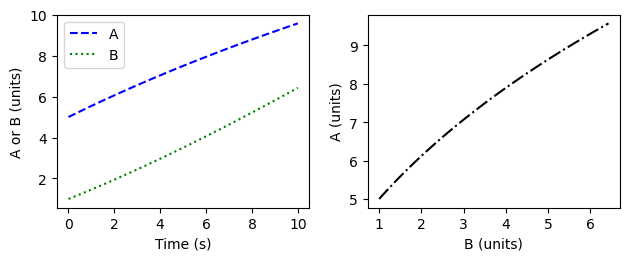

In [1]:
########## Ordinary differential equations system solver ##########

###### 1. Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

###### 2. Specify known values
c1 = 1
c2 = 0.2

###### 2. Set initial conditions of dependent variables U and integration limits of independent variable t 
U0 = [5,1] # In this example U0[0] is variable A and U0[1] is variable B
tlim = (0,10) # This integrates from t0 = 0 to tf = 10
tlist = np.linspace(tlim[0],tlim[1],num=101) # Not essential--specifies intervals along tlim to store U values

###### 3. Define differential equations along with additional required calculations

def diff(t,U):
    
    # Assign values to inputs if desired
    A = U[0]
    B = U[1]
    
    # Define equations
    dU=np.zeros(len(U))
    dU[0] = c1 - c2 * A**0.5
    dU[1] = c2 * A**0.5
    
    # Reorganize list to fit required dimensions 
    dU = np.array(dU).tolist()
    
    return dU

###### Integrate

soln = solve_ivp(diff,tlim,U0,t_eval=tlist)

### Obtain output dependent variable array U and independent variable array t

U = soln.y.T # T makes transpose; not essential but easy for input to dataframe
t = soln.t

A = U[:,0] # Define individual variables within U if desired
B = U[:,1]

### Define pandas dataframe with outputs

soln_df = pd.DataFrame(t,columns = ['Time (s)'])
soln_df[['A (units)','B (units)']] = pd.DataFrame(U)

### Save dataframe to a csv
soln_df.to_csv('ODE_solver_output.csv')

### Report dataframe
print(soln_df)

### Plotting the output with subplots
fig = plt.figure()
ax1 = plt.subplot(221) # A and B vs time
ax2 = plt.subplot(222) # A vs B

ax1.plot(t,A,'--b')
ax1.plot(t,B,':g')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('A or B (units)')
#ax1.set_xlim([0,13])
#ax1.set_ylim([0,5])
ax1.legend(['A','B'])

ax2.plot(B,A,'-.k')
ax2.set_xlabel('B (units)')
ax2.set_ylabel('A (units)')

fig.tight_layout()
plt.show()

In [2]:
print(soln)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  9.900e+00  1.000e+01]
        y: [[ 5.000e+00  5.055e+00 ...  9.533e+00  9.572e+00]
            [ 1.000e+00  1.045e+00 ...  6.367e+00  6.428e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 20
     njev: 0
      nlu: 0
